In [1]:
import os
import logging
import boto3
import zipfile
import json
import io
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO

In [2]:
s3_host = 'https://obj.umiacs.umd.edu'
access_key_id = "xxxxx"
secret_access_key = "xxxxx"

s3 = boto3.client('s3', 
                  endpoint_url=s3_host, 
                  aws_access_key_id=access_key_id, 
                  aws_secret_access_key=secret_access_key)

bucket = 'twitter.ei'


In [3]:
def process(file):
    zip_object = s3.get_object(Bucket=bucket, Key=file)
    zip_contents = zip_object['Body'].read()
    zip_file = zipfile.ZipFile(io.BytesIO(zip_contents), 'r')
    for file_info in zip_file.infolist():
        with zip_file.open(file_info) as csv_file:
            dates_df = None
            try:
                if dates_df == None:
                    dates_df = pd.read_csv(csv_file)
                else:
                    dates_df = pd.concat([dates_df, pd.read_csv(csv_file)], axis=0)
            except:
                print(f"{csv_file.filename} is not a csv file")
    return dates_df


In [4]:
folder_prefix_lst = ["2019_08/china_082019_1/china_082019_1_tweets_csv_unhashed.zip",
                     "2019_08/china_082019_2/china_082019_2_tweets_csv_unhashed.zip",
                     "2019_08/china_082019_3/china_082019_3_tweets_csv_unhashed.zip",
                     "2020_05/china_052020/china_052020_tweets_csv_unhashed.zip", 
                     "2020_09/thailand_092020/thailand_092020_tweets_csv_unhashed.zip"]

dates_lst = []

for folder in folder_prefix_lst:
    print(folder)
    time = process(folder)
    time["tweet_time"] = pd.to_datetime(time["tweet_time"])
    date_time = time["tweet_time"].to_frame()
    dates_lst.append(date_time)

2019_08/china_082019_1/china_082019_1_tweets_csv_unhashed.zip


/var/folders/r4/sgr1zrxx0038xwsxj6n3k8900000gn/T/ipykernel_42702/514935199.py:10: DtypeWarning: Columns (6,30) have mixed types. Specify dtype option on import or set low_memory=False.
  dates_df = pd.read_csv(csv_file)


2019_08/china_082019_2/china_082019_2_tweets_csv_unhashed.zip


/var/folders/r4/sgr1zrxx0038xwsxj6n3k8900000gn/T/ipykernel_42702/514935199.py:10: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dates_df = pd.read_csv(csv_file)


2019_08/china_082019_3/china_082019_3_tweets_csv_unhashed.zip


/var/folders/r4/sgr1zrxx0038xwsxj6n3k8900000gn/T/ipykernel_42702/514935199.py:10: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dates_df = pd.read_csv(csv_file)
/var/folders/r4/sgr1zrxx0038xwsxj6n3k8900000gn/T/ipykernel_42702/514935199.py:10: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dates_df = pd.read_csv(csv_file)


2020_05/china_052020/china_052020_tweets_csv_unhashed.zip
2020_09/thailand_092020/thailand_092020_tweets_csv_unhashed.zip


number of total days: 4086, number of total tweets: 1898108


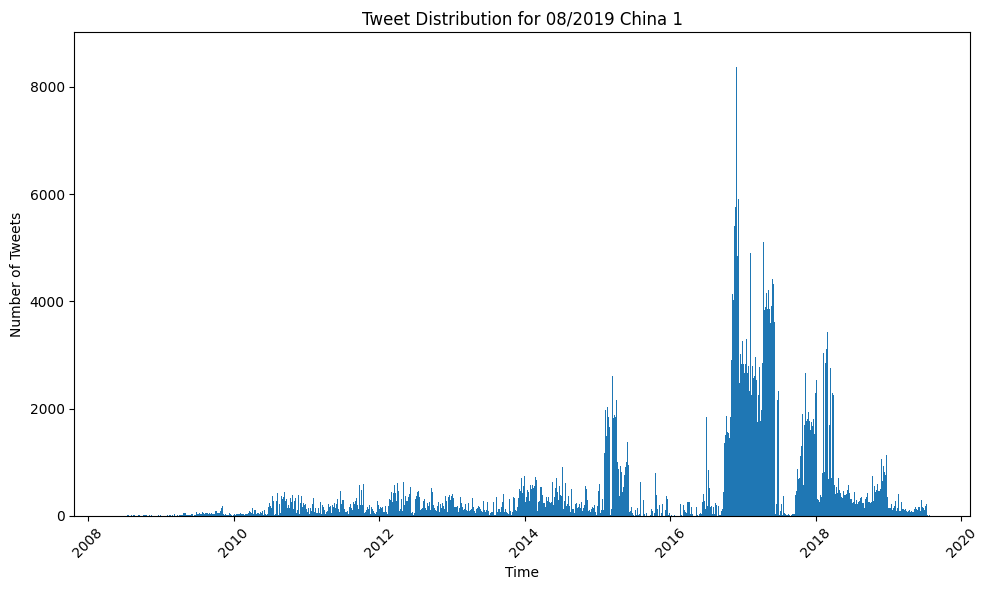

number of total days: 4232, number of total tweets: 1701257


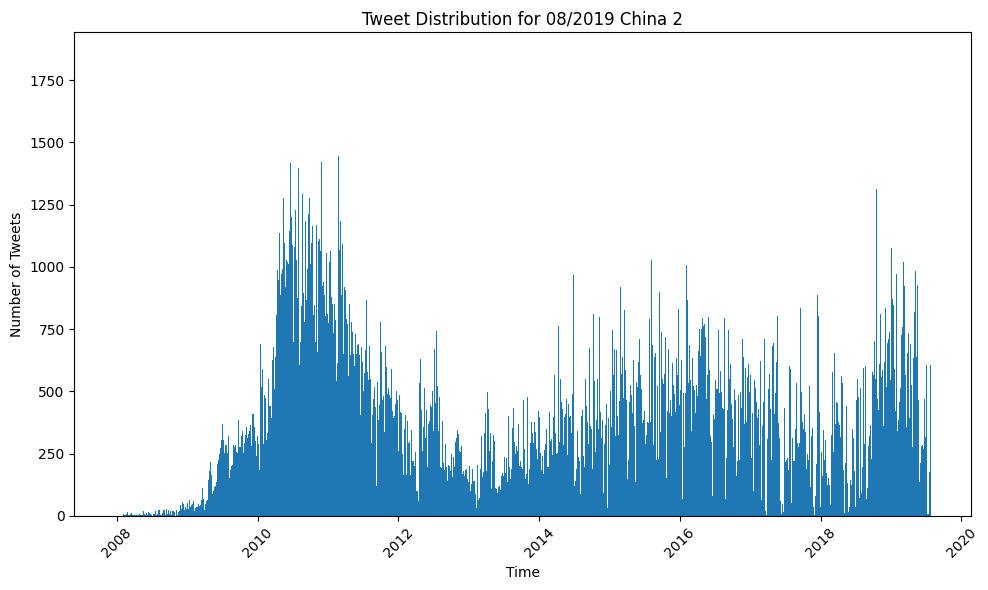

number of total days: 774, number of total tweets: 2875334


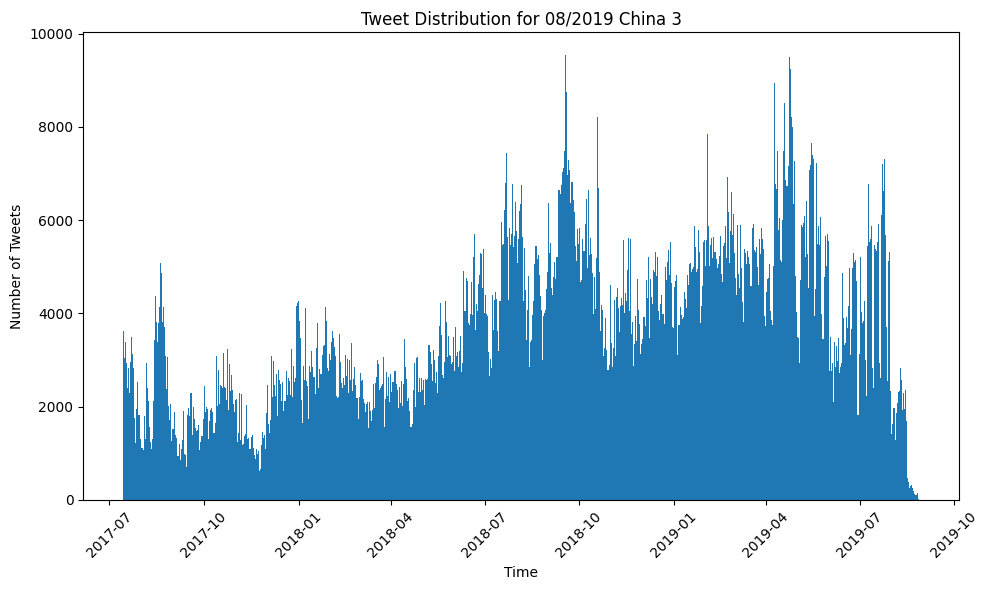

number of total days: 826, number of total tweets: 348608


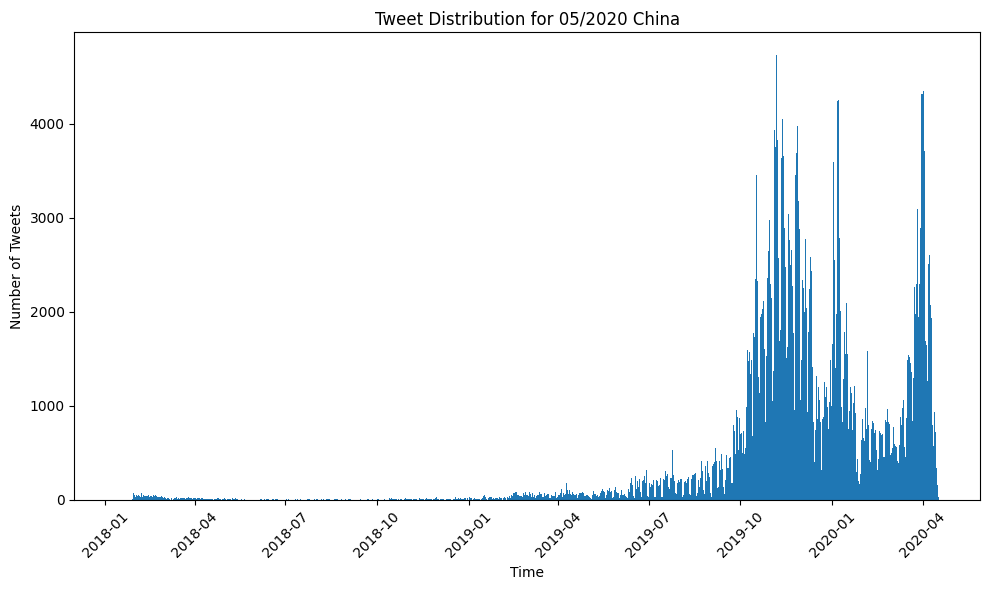

number of total days: 1743, number of total tweets: 21385


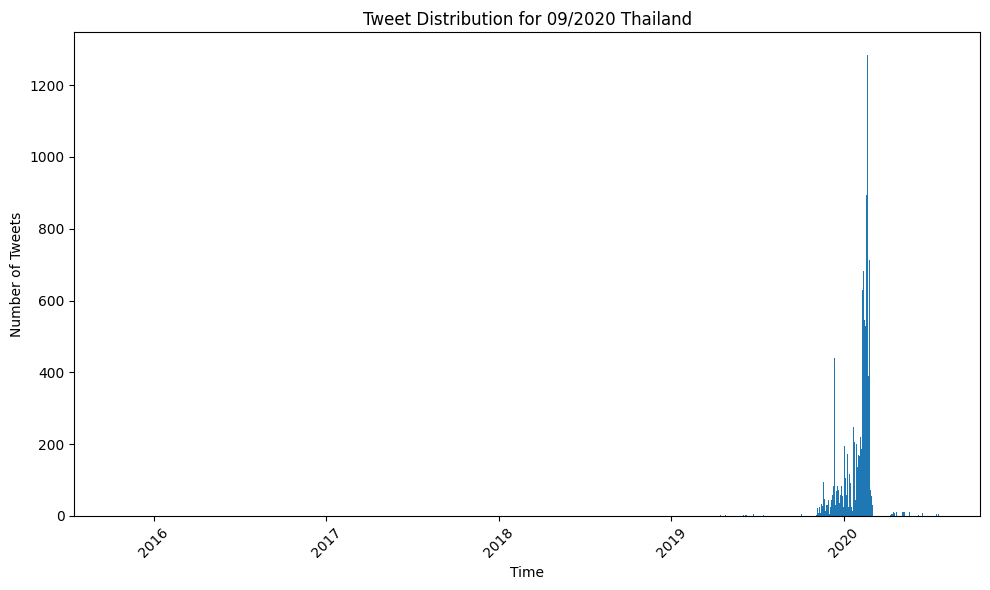

In [5]:
i = 0
for time_df in dates_lst:    
   time_series = time_df["tweet_time"]
   i+=1
   num_days = int((time_series.max() - time_series.min()).total_seconds() / (60 * 60 * 24))
   bin = int (num_days)
   print(f"number of total days: {bin}, number of total tweets: {len(time_series)}")
   plt.figure(figsize=(10, 6))
   plt.hist(time_series, bins=bin)
   if i <= 3:
      plt.title(f'Tweet Distribution for 08/2019 China {i}')
   elif i == 4:
      plt.title(f'Tweet Distribution for 05/2020 China')
   else:
      plt.title(f'Tweet Distribution for 09/2020 Thailand')
   plt.xlabel('Time')
   plt.ylabel('Number of Tweets')
   plt.xticks(rotation=45)
   plt.tight_layout()
   plt.show()

In [6]:
title = ["china_082019_1", "china_082019_2", "china_082019_3", "china_052020", "thailand_092020"]
i = 0
for time_df in dates_lst:
    time_df.to_csv(f"~/Coding/buntain/time_series_data/twitterrei_{title[i]}.csv", index=False)
    i+=1